In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
raw_data = pd.read_excel('C:/Workspace/분석데이터활용/pandasData분석/data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [14]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [15]:
raw_data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### [미션] 승객 fare 확인

In [18]:
raw_data['fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64

In [20]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [25]:
raw_data = raw_data.drop(['ticket','cabin'],axis=1)

In [26]:
# fare nan을 중앙값으로 대체
raw_data['fare'].fillna(raw_data['fare'].dropna().median(),inplace=True)
raw_data['fare'].isna().sum()

0

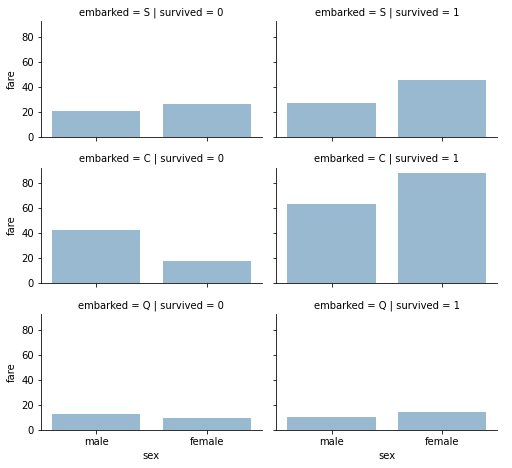

In [29]:
grid = sns.FacetGrid(raw_data,row='embarked',col='survived',height=2.2,aspect=1.6)
grid.map(sns.barplot,'sex','fare',alpha=0.5,ci=None,order=['male','female'])
grid.add_legend()

In [32]:
raw_data['fareBand'] = pd.cut(raw_data['fare'],5)
raw_data[['fareBand','survived']].groupby(['fareBand'],as_index=False).mean().sort_values(by='fareBand',ascending=False)

,fareBand,survived
4,"(409.863, 512.329]",1.000000
3,"(307.398, 409.863]",NaN
2,"(204.932, 307.398]",0.647059
1,"(102.466, 204.932]",0.739130
0,"(-0.512, 102.466]",0.359184


In [31]:
raw_data[['pclass','survived']].groupby(['pclass'],as_index=False).mean().sort_values(by='pclass',ascending=True)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [35]:
column_name = raw_data.columns.values
column_name

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'boat', 'body', 'home.dest', 'fareBand'],
      dtype=object)

C:\Users\igksj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


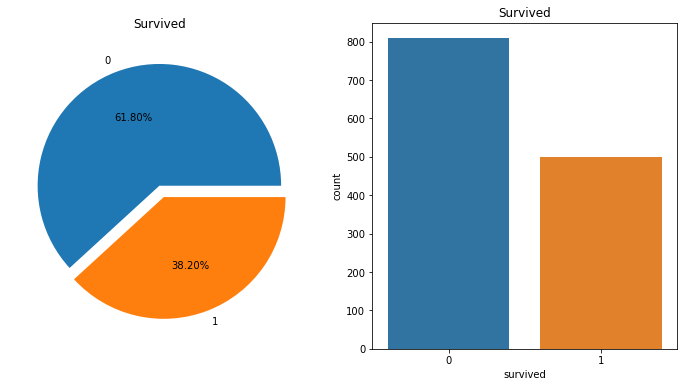

In [38]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()
plt.close()

C:\Users\igksj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


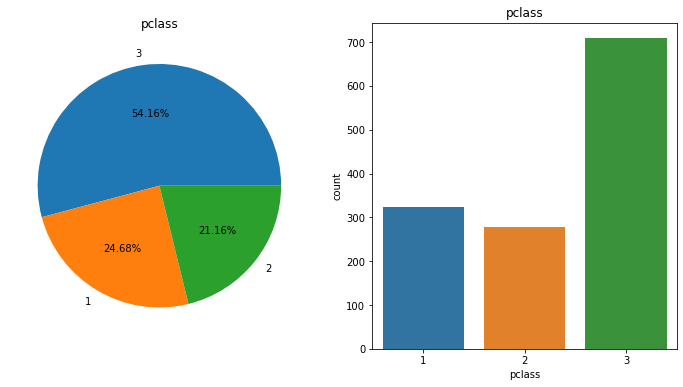

In [41]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['pclass'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('pclass')
ax[0].set_ylabel('')

sns.countplot('pclass',data=raw_data,ax=ax[1])
ax[1].set_title('pclass')
plt.show()
plt.close()

In [33]:
raw_data[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


C:\Users\igksj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

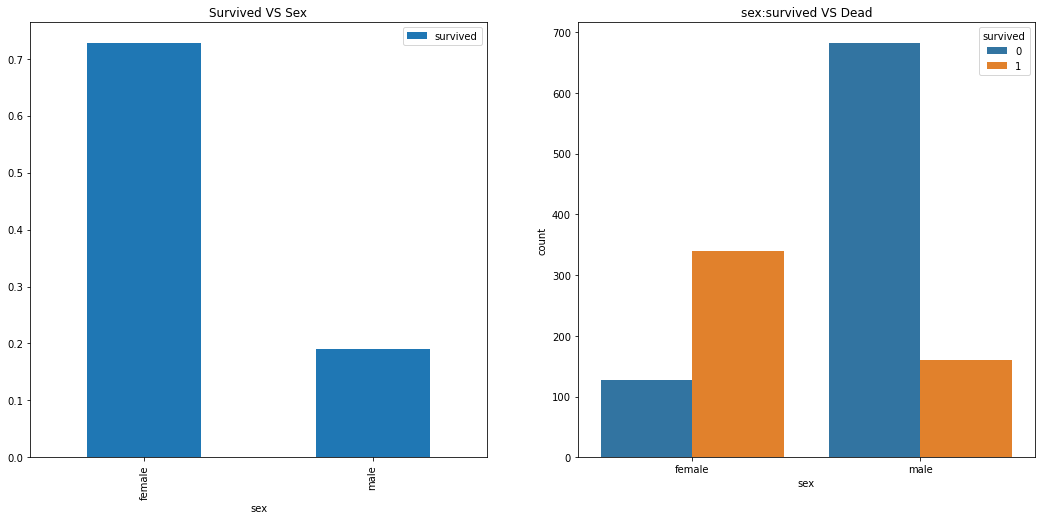

In [42]:
f,ax = plt.subplots(1,2,figsize=(18,8))
raw_data[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('sex',hue='survived',data=raw_data,ax=ax[1])
ax[1].set_title('sex:survived VS Dead')
plt.show

In [43]:
pd.crosstab(raw_data.pclass,raw_data.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [44]:
## 성별별, 선실등급별 생존자 확인
pd.crosstab([raw_data.sex,raw_data.survived],raw_data.pclass,margins=True).style.background_gradient(cmap='summer_r')

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.304513,155.818182


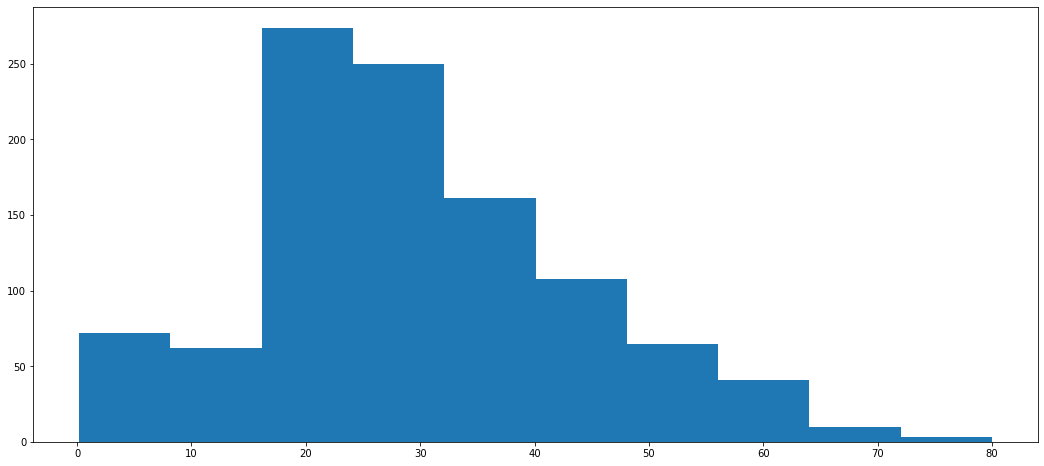

In [45]:
raw_data['age'].hist(bins=10,figsize=(18,8),grid=False);
raw_data.groupby('pclass').mean()

            pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558683 -0.034642
survived -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244414       NaN
age      -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.177528  0.058809
sibsp     0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160349 -0.099961
parch     0.018322  0.082660 -0.150917  0.373587  1.000000  0.221635  0.051099
fare     -0.558683  0.244414  0.177528  0.160349  0.221635  1.000000 -0.046432
body     -0.034642       NaN  0.058809 -0.099961  0.051099 -0.046432  1.000000


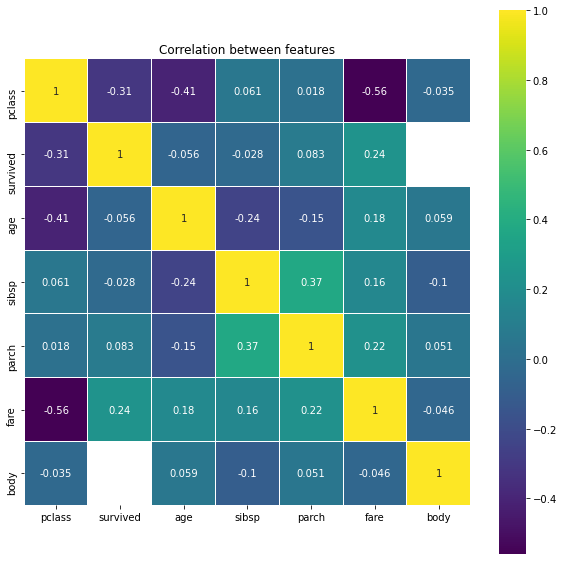

In [46]:
print(raw_data.corr())

plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

C:\Users\igksj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\igksj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\igksj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


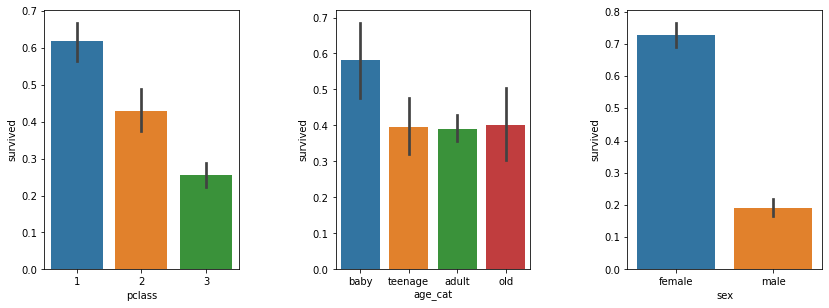

In [47]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

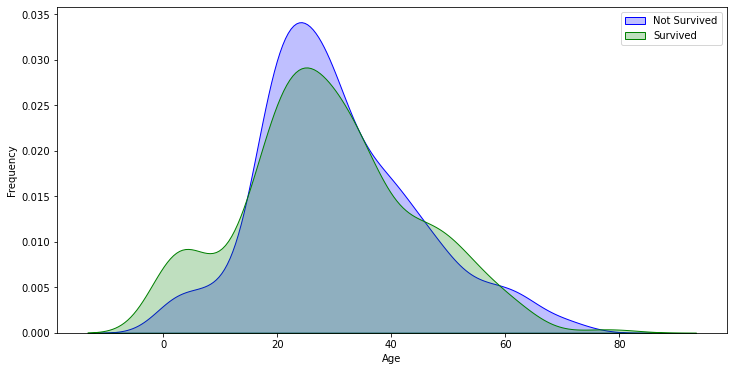

In [48]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

## 와인 로지스틱회귀분석

In [49]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv()